In [763]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(123)
sns.set_style('white')
plt.rc('font', family='NanumGothic')
plt.rc('axes', unicode_minus=False)

In [766]:
tr = pd.read_csv('data/trainset.csv')
te = pd.read_csv('data/testset_final.csv')
# tr = pd.read_csv('/kaggle/input/kmu-ml/trainset.csv')
# te = pd.read_csv('/kaggle/input/kmu-ml/testset_final.csv')

drop_col = ['매니저최초가입일', '매니저최초서비스일', '접수시각']
tr.매니저생년월일 = tr.매니저생년월일.str[:4]
df = pd.concat([tr,te])
print(df.columns)
df = df.drop(columns=drop_col)

Index(['SEQ', '접수일', '접수시각', '장기서비스여부', '최초서비스일', '전체회차', '현재회차', '서비스일자',
       '서비스시작시간', '서비스종료시간', '기존고객여부', '결재형태', '서비스주소', '주거형태', '평수', '고객가입일',
       '반려동물', '부재중여부', '우선청소', '쿠폰사용여부', '매니저생년월일', '매니저최초가입일', '매니저최초서비스일',
       '매니저성별', '매니저사용휴대폰', '매니저주소', '매니저이동방법', '근무가능지역', 'CS교육이수여부',
       '청소교육이수여부', '부재중서비스가능여부', '추천인여부', '매칭성공여부'],
      dtype='object')


In [722]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27253 entries, 0 to 4243
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SEQ         27253 non-null  object 
 1   접수일         27253 non-null  object 
 2   장기서비스여부     27253 non-null  int64  
 3   최초서비스일      27253 non-null  object 
 4   전체회차        27253 non-null  int64  
 5   현재회차        27253 non-null  int64  
 6   서비스일자       27253 non-null  object 
 7   서비스시작시간     27253 non-null  object 
 8   서비스종료시간     27253 non-null  object 
 9   기존고객여부      27253 non-null  int64  
 10  결재형태        27247 non-null  object 
 11  서비스주소       27253 non-null  object 
 12  주거형태        27253 non-null  object 
 13  평수          16802 non-null  object 
 14  고객가입일       27093 non-null  object 
 15  반려동물        24102 non-null  object 
 16  부재중여부       16802 non-null  float64
 17  우선청소        13360 non-null  object 
 18  쿠폰사용여부      27253 non-null  int64  
 19  매니저생년월일     27253 non-null

In [723]:
df['접수일'] = pd.to_datetime(df['접수일'])
df['최초서비스일'] = pd.to_datetime(df['최초서비스일'])
df['서비스일자'] = pd.to_datetime(df['서비스일자'])
df['고객가입일'] = pd.to_datetime(df['고객가입일'])
df['서비스시작시간'] = pd.to_datetime(df['서비스시작시간'])
df['서비스종료시간'] = pd.to_datetime(df['서비스종료시간'])

In [724]:
my_dict = {}
my_dict['접수년'] = df['접수일'].dt.year
my_dict['접수월'] = df['접수일'].dt.month
my_dict['접수일'] = df['접수일'].dt.day
my_dict['접수분기'] = df['접수일'].dt.quarter
my_dict['접수요일'] = df['접수일'].dt.weekday
my_dict['최초서비스차이'] = (df['최초서비스일']-df['접수일']).dt.days
my_dict['서비스년'] = df['서비스일자'].dt.year
my_dict['서비스월'] = df['서비스일자'].dt.month
my_dict['서비스일'] = df['서비스일자'].dt.day
my_dict['서비스분기'] = df['서비스일자'].dt.quarter
my_dict['서비스요일'] = df['서비스일자'].dt.weekday
my_dict['접수일서비스일차이'] = (df['서비스일자']-df['접수일']).dt.days
my_dict['가입일수'] = (datetime.today() - pd.to_datetime(df['고객가입일'])).dt.days.fillna(0)
my_dict['서비스시작시간'] = df['서비스시작시간'].dt.hour
my_dict['서비스종료시간'] = df['서비스종료시간'].dt.hour
my_dict['서비스시간'] = (my_dict['서비스종료시간'] - my_dict['서비스시작시간'])
my_dict = pd.DataFrame(my_dict)
my_dict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27253 entries, 0 to 4243
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   접수년        27253 non-null  int64  
 1   접수월        27253 non-null  int64  
 2   접수일        27253 non-null  int64  
 3   접수분기       27253 non-null  int64  
 4   접수요일       27253 non-null  int64  
 5   최초서비스차이    27253 non-null  int64  
 6   서비스년       27253 non-null  int64  
 7   서비스월       27253 non-null  int64  
 8   서비스일       27253 non-null  int64  
 9   서비스분기      27253 non-null  int64  
 10  서비스요일      27253 non-null  int64  
 11  접수일서비스일차이  27253 non-null  int64  
 12  가입일수       27253 non-null  float64
 13  서비스시작시간    27253 non-null  int64  
 14  서비스종료시간    27253 non-null  int64  
 15  서비스시간      27253 non-null  int64  
dtypes: float64(1), int64(15)
memory usage: 3.5 MB


In [725]:
#범주형 데이터
df_cat = df.select_dtypes(['object'])
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27253 entries, 0 to 4243
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   SEQ       27253 non-null  object
 1   결재형태      27247 non-null  object
 2   서비스주소     27253 non-null  object
 3   주거형태      27253 non-null  object
 4   평수        16802 non-null  object
 5   반려동물      24102 non-null  object
 6   우선청소      13360 non-null  object
 7   매니저생년월일   27253 non-null  object
 8   매니저사용휴대폰  24024 non-null  object
 9   매니저주소     23009 non-null  object
 10  매니저이동방법   26931 non-null  object
 11  근무가능지역    27253 non-null  object
dtypes: object(12)
memory usage: 2.7+ MB


In [726]:
col = ['SEQ']
df_cat = df_cat.drop(columns=col)
df_cat.nunique()

결재형태         4
서비스주소       49
주거형태         2
평수           4
반려동물         7
우선청소         5
매니저생년월일     70
매니저사용휴대폰     3
매니저주소       36
매니저이동방법      2
근무가능지역       8
dtype: int64

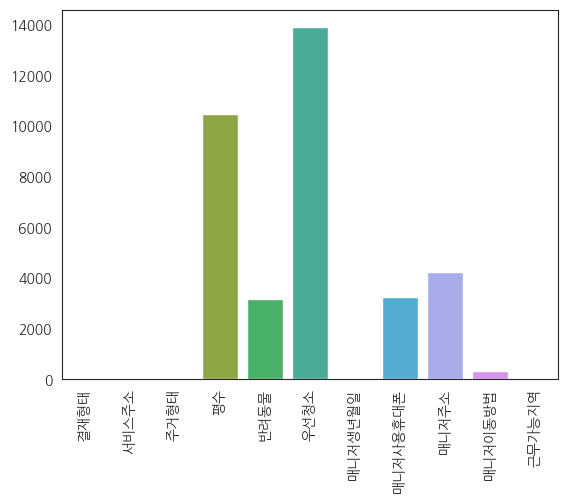

In [727]:
sns.barplot(x=df_cat.columns, y=df_cat.isnull().sum())
plt.xticks(rotation=90);

In [728]:
#범주형 결측치 others
df_cat = df_cat.fillna('OTHERS')
df_cat.isnull().sum()

결재형태        0
서비스주소       0
주거형태        0
평수          0
반려동물        0
우선청소        0
매니저생년월일     0
매니저사용휴대폰    0
매니저주소       0
매니저이동방법     0
근무가능지역      0
dtype: int64

In [729]:
graph_cols = list(df_cat.columns[(df_cat.nunique()<20).values])
graph_cols

['결재형태', '주거형태', '평수', '반려동물', '우선청소', '매니저사용휴대폰', '매니저이동방법', '근무가능지역']

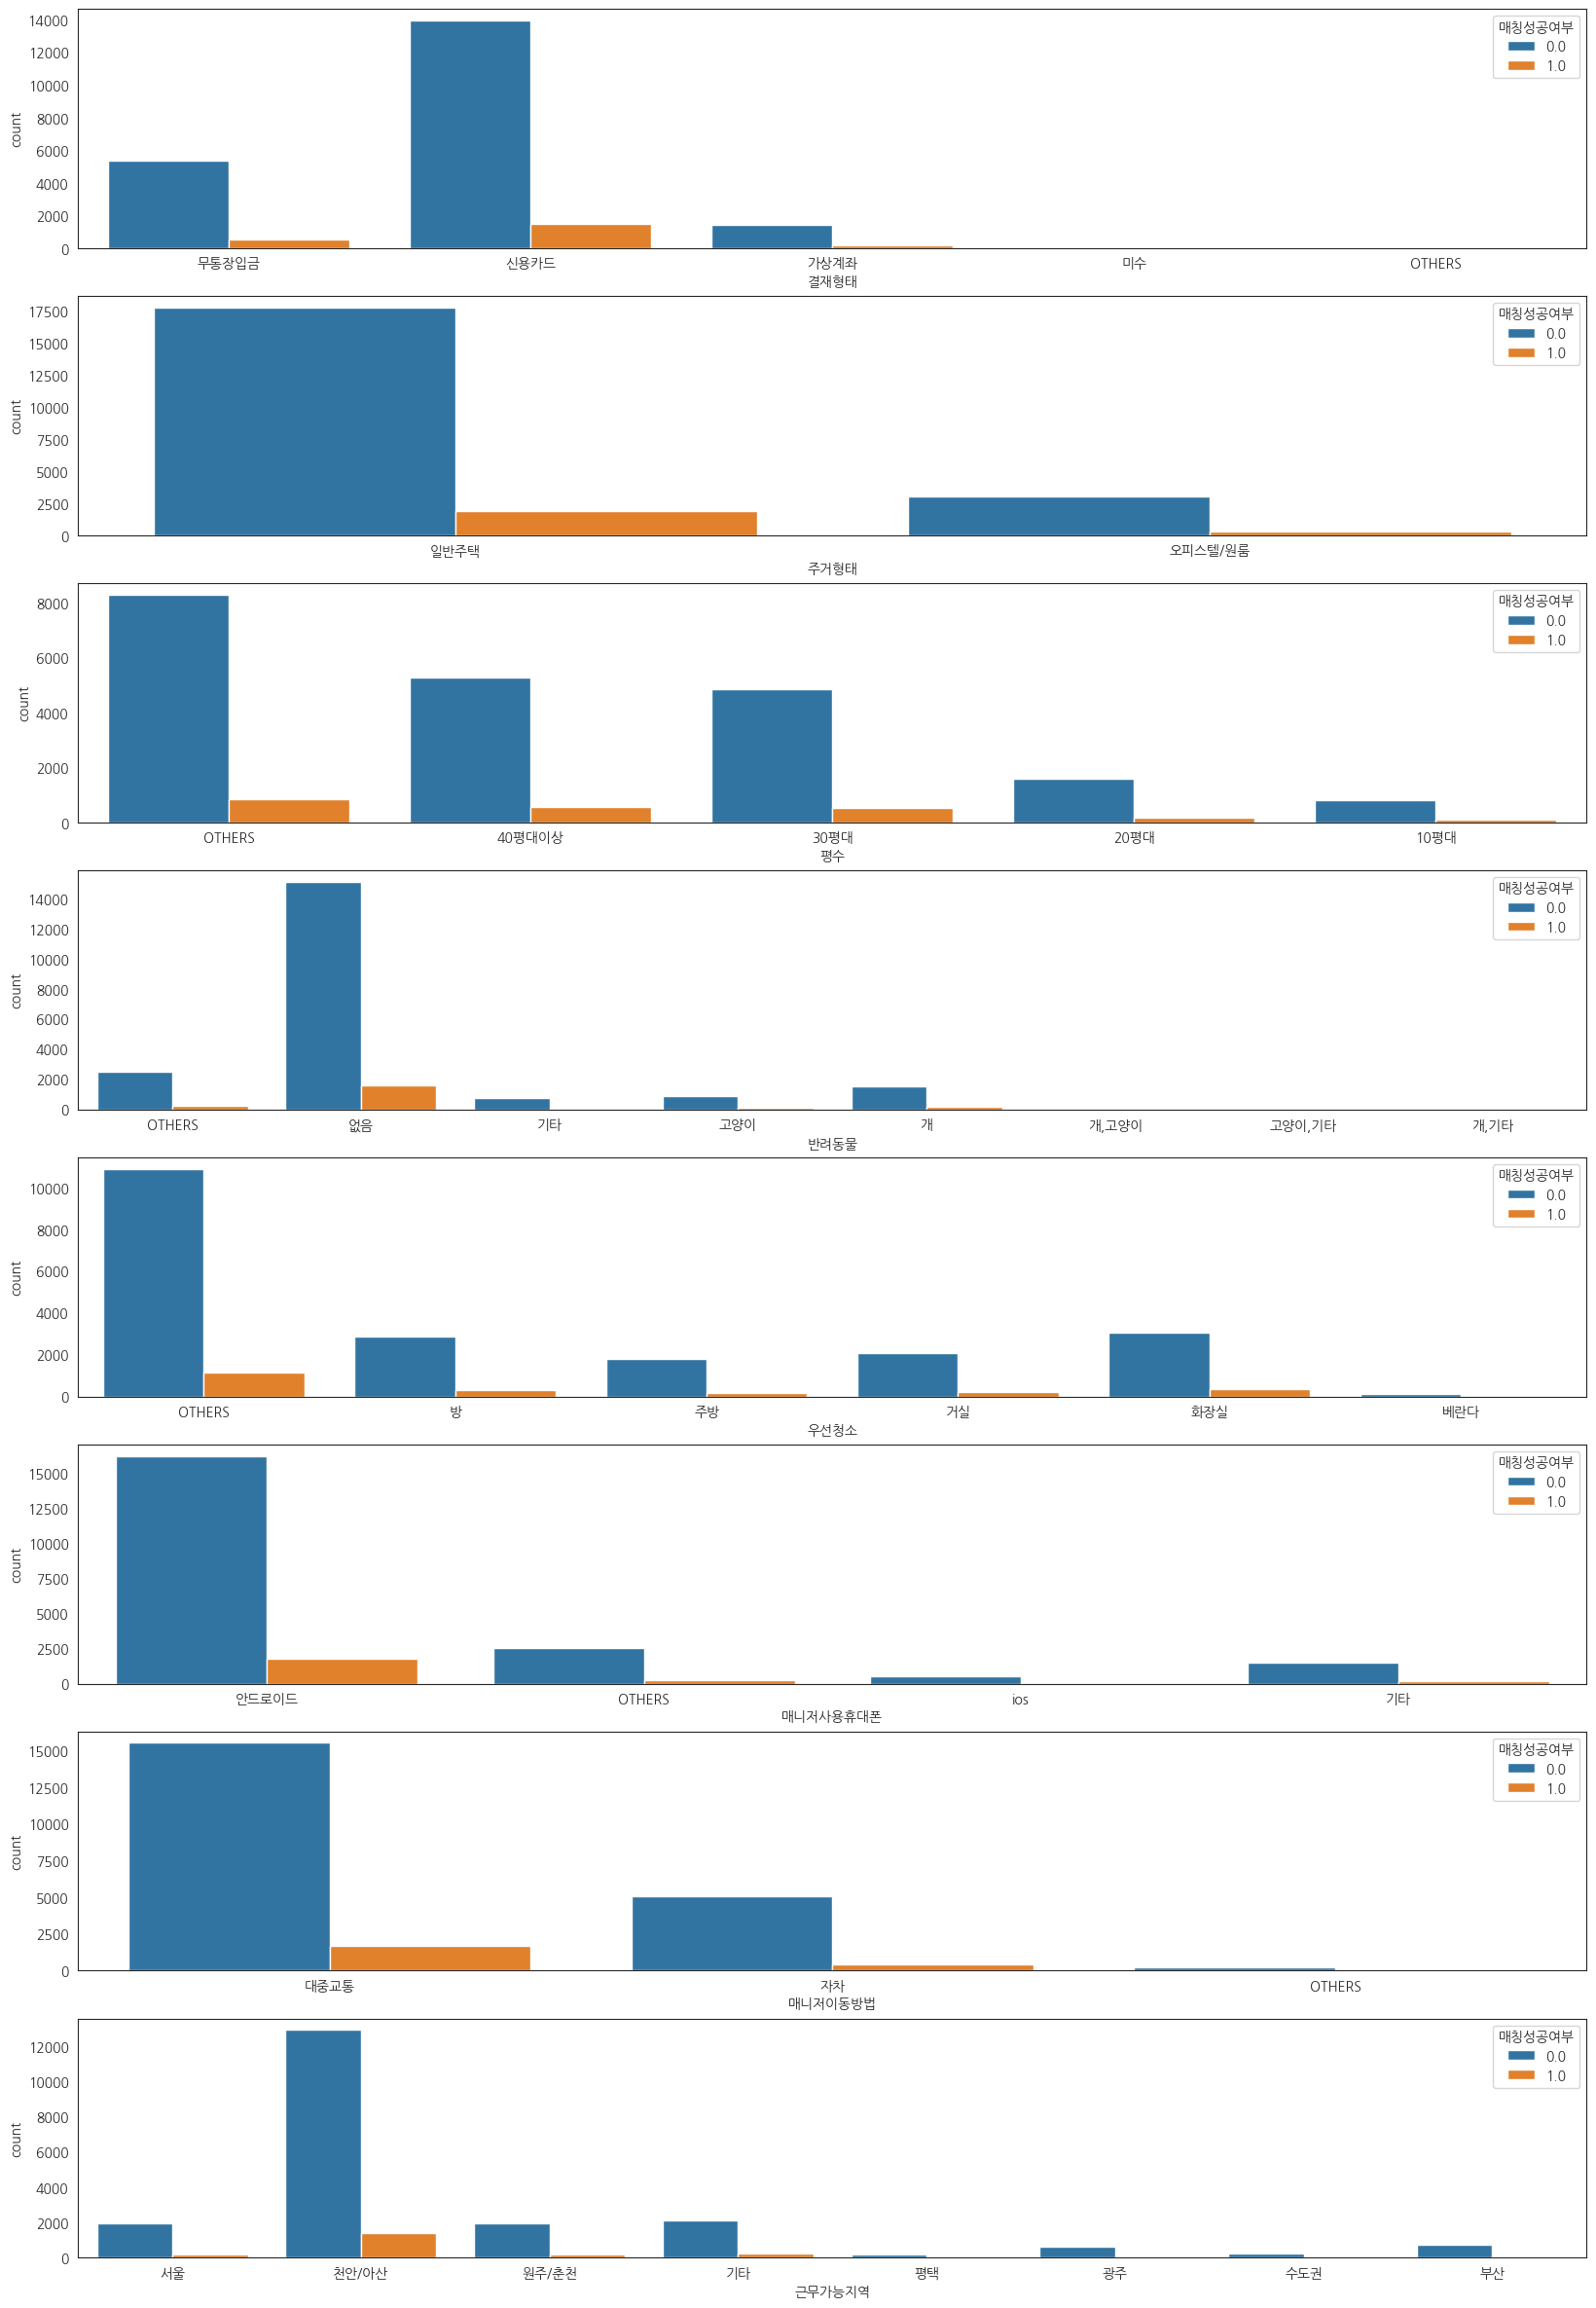

In [730]:
fig, ax = plt.subplots(nrows=len(graph_cols), ncols=1, figsize=(20,30))
for i, a in zip(graph_cols, ax):
    sns.countplot(x=i, data=df_cat, hue=df['매칭성공여부'], ax=a)

In [731]:
# - 기본 원-핫
# - 10개 이상 바이너리 encoding
# - 너무 많으면 mean encoding

# 결재형태         4
# 서비스주소       49 : mean
# 주거형태         2
# 평수           4
# 반려동물         7
# 우선청소         5
# 매니저생년월일     70 : mean
# 매니저사용휴대폰     3
# 매니저이동방법      2
# 근무가능지역       8
#====================================

In [732]:
df_cat['결재형태'].unique()

array(['무통장입금', '신용카드', '가상계좌', '미수', 'OTHERS'], dtype=object)

In [733]:
my_dict['신용카드'] = (df_cat['결재형태'] == '신용카드').astype('int')
my_dict['무통장입금']  = (df_cat['결재형태'] == '무통장입금').astype('int')
my_dict['가상계좌']  = (df_cat['결재형태'] == '가상계좌').astype('int')
my_dict['미수']  = (df_cat['결재형태'] == '미수').astype('int')
my_dict['미수']  = (df_cat['결재형태'] == 'OTHERS').astype('int')

In [734]:
df_cat['서비스주소'].unique()

array(['충남 천안시', '서울 강서구', '충남 아산시', '강원 원주시', '광주 북구', '서울 은평구',
       '서울 용산구', '서울 강동구', '서울 강남구', '경기 평택시', '강원 춘천시', '경기 성남시',
       '서울 영등포구', '서울 금천구', '광주 남구', '서울 동작구', '부산 강서구', '광주 광산구',
       '광주 서구', '서울 동대문구', '서울 관악구', '경기 의정부시', '서울 성동구', '부산 연제구',
       '서울 중구', '서울 성북구', '서울 서초구', '경기 안성시', '서울 강북구', '경남 창원시',
       '서울 마포구', '부산 해운대구', '광주 동구', '부산 사하구', '서울 서대문구', '서울 종로구',
       '서울 도봉구', '부산 동래구', '서울 노원구', '부산 동구', '서울 중랑구', '서울 구로구', '부산 북구',
       '경기 화성시', '서울 광진구', '서울 송파구', '부산 부산진구', '부산 금정구', '부산 사상구'],
      dtype=object)

In [735]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27253 entries, 0 to 4243
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   결재형태      27253 non-null  object
 1   서비스주소     27253 non-null  object
 2   주거형태      27253 non-null  object
 3   평수        27253 non-null  object
 4   반려동물      27253 non-null  object
 5   우선청소      27253 non-null  object
 6   매니저생년월일   27253 non-null  object
 7   매니저사용휴대폰  27253 non-null  object
 8   매니저주소     27253 non-null  object
 9   매니저이동방법   27253 non-null  object
 10  근무가능지역    27253 non-null  object
dtypes: object(11)
memory usage: 2.5+ MB


In [736]:
df_cat['매칭성공여부'] = df['매칭성공여부']
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27253 entries, 0 to 4243
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   결재형태      27253 non-null  object 
 1   서비스주소     27253 non-null  object 
 2   주거형태      27253 non-null  object 
 3   평수        27253 non-null  object 
 4   반려동물      27253 non-null  object 
 5   우선청소      27253 non-null  object 
 6   매니저생년월일   27253 non-null  object 
 7   매니저사용휴대폰  27253 non-null  object 
 8   매니저주소     27253 non-null  object 
 9   매니저이동방법   27253 non-null  object 
 10  근무가능지역    27253 non-null  object 
 11  매칭성공여부    23009 non-null  float64
dtypes: float64(1), object(11)
memory usage: 2.7+ MB


In [737]:
my_dict['충남'] = (df_cat['서비스주소'].str.split(expand=True)[0] == '충남').astype('int')
my_dict['서울'] = (df_cat['서비스주소'].str.split(expand=True)[0] == '서울').astype('int')
my_dict['강원'] = (df_cat['서비스주소'].str.split(expand=True)[0] == '강원').astype('int')
my_dict['부산'] = (df_cat['서비스주소'].str.split(expand=True)[0] == '부산').astype('int')
my_dict['광주'] = (df_cat['서비스주소'].str.split(expand=True)[0] == '광주').astype('int')
my_dict['경기'] = (df_cat['서비스주소'].str.split(expand=True)[0] == '경기').astype('int')
my_dict['경남'] = (df_cat['서비스주소'].str.split(expand=True)[0] == '경남').astype('int')
#my_dict['서비스주소'] = df_cat['서비스주소'].map(df_cat.groupby('서비스주소')['매칭성공여부'].mean())

n_size = df_cat.groupby('서비스주소').size()
global_mean = df.매칭성공여부.mean()
alpha = 0.9 # alpha값이 크면 클수록 smooth -> 평균에 가깝게

def smoothing(n_rows, target_mean):
    return (target_mean*n_rows + global_mean*alpha) / (n_rows + alpha)

my_dict['서비스주소'] = df_cat['서비스주소'].map(df_cat.apply(lambda x: smoothing(n_size, df_cat.groupby('서비스주소')['매칭성공여부'].mean()))['서비스주소'])

In [738]:
#주거형태
df_cat['주거형태'].unique()

my_dict['일반주택'] = (df_cat['주거형태']=='일반주택').astype('int')
my_dict['오피스텔/원룸'] = (df_cat['주거형태']=='오피스텔/원룸').astype('int')

In [739]:
#평수
df_cat['평수'].unique()
df_cat.loc[(df_cat['평수']=='OTHERS'),'평수'] = 5
df_cat.loc[(df_cat['평수']=='40평대이상'),'평수'] = 4
df_cat.loc[(df_cat['평수']=='30평대'),'평수'] = 3
df_cat.loc[(df_cat['평수']=='20평대'),'평수'] = 2
df_cat.loc[(df_cat['평수']=='10평대'),'평수'] = 1

my_dict['평수'] = df_cat['평수'].astype('int')

In [740]:
#반려동물
df_cat['반려동물'].unique()
my_dict['반려동물없음'] = (df['반려동물']=='없음').astype('int')
my_dict['반려동물개'] = (df['반려동물']=='개').astype('int')
my_dict['반려동물고양이'] =(df['반려동물']=='고양이').astype('int')
my_dict['반려동물기타'] =(df['반려동물']=='기타').astype('int')
my_dict['반려동물미응답'] = (df['반려동물'].isnull()).astype('int')

In [741]:
#우선청소
df_cat['우선청소'].unique()
my_dict['화장실'] = (df_cat['우선청소']=='화장실').astype('int')
my_dict['방'] = (df_cat['우선청소']=='방').astype('int')
my_dict['거실'] = (df_cat['우선청소']=='거실').astype('int')
my_dict['주방'] = (df_cat['우선청소']=='주방').astype('int')
my_dict['베란다'] = (df_cat['우선청소']=='베란다').astype('int')
my_dict['이외장소'] = (df_cat['우선청소']=='OTHERS').astype('int') 

In [742]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27253 entries, 0 to 4243
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   결재형태      27253 non-null  object 
 1   서비스주소     27253 non-null  object 
 2   주거형태      27253 non-null  object 
 3   평수        27253 non-null  object 
 4   반려동물      27253 non-null  object 
 5   우선청소      27253 non-null  object 
 6   매니저생년월일   27253 non-null  object 
 7   매니저사용휴대폰  27253 non-null  object 
 8   매니저주소     27253 non-null  object 
 9   매니저이동방법   27253 non-null  object 
 10  근무가능지역    27253 non-null  object 
 11  매칭성공여부    23009 non-null  float64
dtypes: float64(1), object(11)
memory usage: 2.7+ MB


In [743]:
#int(pd.datetime.now().year)
my_dict['매니저나이'] = (int(pd.datetime.now().year) - df_cat['매니저생년월일'].astype('int'))
my_dict['매니저연령대'] = (my_dict['매니저나이']/10).astype('int')
#my_dict['매니저나이'].unique()

/tmp/ipykernel_10725/2301520415.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  my_dict['매니저나이'] = (int(pd.datetime.now().year) - df_cat['매니저생년월일'].astype('int'))


In [744]:
my_dict['안드로이드'] = (df_cat['매니저사용휴대폰']=='안드로이드').astype('int')
my_dict['ios'] = (df_cat['매니저사용휴대폰']=='ios').astype('int')
my_dict['기타'] = (df_cat['매니저사용휴대폰']=='기타').astype('int')
my_dict['휴대폰미등록'] = (df_cat['매니저사용휴대폰']=='OTHERS').astype('int')

In [745]:
my_dict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27253 entries, 0 to 4243
Data columns (total 48 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   접수년        27253 non-null  int64  
 1   접수월        27253 non-null  int64  
 2   접수일        27253 non-null  int64  
 3   접수분기       27253 non-null  int64  
 4   접수요일       27253 non-null  int64  
 5   최초서비스차이    27253 non-null  int64  
 6   서비스년       27253 non-null  int64  
 7   서비스월       27253 non-null  int64  
 8   서비스일       27253 non-null  int64  
 9   서비스분기      27253 non-null  int64  
 10  서비스요일      27253 non-null  int64  
 11  접수일서비스일차이  27253 non-null  int64  
 12  가입일수       27253 non-null  float64
 13  서비스시작시간    27253 non-null  int64  
 14  서비스종료시간    27253 non-null  int64  
 15  서비스시간      27253 non-null  int64  
 16  신용카드       27253 non-null  int64  
 17  무통장입금      27253 non-null  int64  
 18  가상계좌       27253 non-null  int64  
 19  미수         27253 non-null  int64  
 20  충남     

In [746]:
my_dict['매니저자차'] = (df_cat['매니저이동방법']=='자차').astype('int')
my_dict['매니저대중교통'] = (df_cat['매니저이동방법']=='대중교통').astype('int')
my_dict['매니저그외교통'] = (df_cat['매니저이동방법']=='OTHERS').astype('int')

In [747]:
df_cat['서비스주소'].unique()

array(['충남 천안시', '서울 강서구', '충남 아산시', '강원 원주시', '광주 북구', '서울 은평구',
       '서울 용산구', '서울 강동구', '서울 강남구', '경기 평택시', '강원 춘천시', '경기 성남시',
       '서울 영등포구', '서울 금천구', '광주 남구', '서울 동작구', '부산 강서구', '광주 광산구',
       '광주 서구', '서울 동대문구', '서울 관악구', '경기 의정부시', '서울 성동구', '부산 연제구',
       '서울 중구', '서울 성북구', '서울 서초구', '경기 안성시', '서울 강북구', '경남 창원시',
       '서울 마포구', '부산 해운대구', '광주 동구', '부산 사하구', '서울 서대문구', '서울 종로구',
       '서울 도봉구', '부산 동래구', '서울 노원구', '부산 동구', '서울 중랑구', '서울 구로구', '부산 북구',
       '경기 화성시', '서울 광진구', '서울 송파구', '부산 부산진구', '부산 금정구', '부산 사상구'],
      dtype=object)

In [748]:
df_cat['매니저주소'].unique()

array(['서울 양천구', '충남 천안시', '서울 서대문구', '강원 원주시', '충남 아산시', '서울 마포구',
       '서울 영등포구', '서울 송파구', '서울 동작구', '경기 평택시', '서울 관악구', '충남 세종시',
       '강원 춘천시', '서울 중랑구', '광주 동구', '경기 화성시', '서울 노원구', '부산 해운대구',
       '서울 종로구', '서울 강남구', '부산 남구', '서울 서초구', '경기 수원시', '부산 부산진구',
       '광주 남구', '부산 사상구', '부산 수영구', '서울 강북구', '광주 서구', '서울 성동구', '서울 금천구',
       '서울 강동구', '인천 남동구', '서울 구로구', '경남 창원시', '서울 은평구', 'OTHERS'],
      dtype=object)

In [749]:
my_dict['m충남'] = (df_cat['매니저주소'].str.split(expand=True)[0] == '충남').astype('int')
my_dict['m서울'] = (df_cat['매니저주소'].str.split(expand=True)[0] == '서울').astype('int')
my_dict['m강원'] = (df_cat['매니저주소'].str.split(expand=True)[0] == '강원').astype('int')
my_dict['m광주'] = (df_cat['매니저주소'].str.split(expand=True)[0] == '광주').astype('int')
my_dict['m부산'] = (df_cat['매니저주소'].str.split(expand=True)[0] == '부산').astype('int')
my_dict['m경기'] = (df_cat['매니저주소'].str.split(expand=True)[0] == '경기').astype('int')
my_dict['m경남'] = (df_cat['매니저주소'].str.split(expand=True)[0] == '경남').astype('int')
my_dict['m인천'] = (df_cat['매니저주소'].str.split(expand=True)[0] == '인천').astype('int')

my_dict['w천안'] = (df_cat['근무가능지역'].str.split(expand=True)[0] == '천안/아산').astype('int')
my_dict['w기타'] = (df_cat['근무가능지역'].str.split(expand=True)[0] == '기타').astype('int')
my_dict['w서울'] = (df_cat['근무가능지역'].str.split(expand=True)[0] == '서울').astype('int')
my_dict['w원주'] = (df_cat['근무가능지역'].str.split(expand=True)[0] == '원주/춘천').astype('int')
my_dict['w부산'] = (df_cat['근무가능지역'].str.split(expand=True)[0] == '부산').astype('int')
my_dict['w광주'] = (df_cat['근무가능지역'].str.split(expand=True)[0] == '광주').astype('int')
my_dict['w수도권'] = (df_cat['근무가능지역'].str.split(expand=True)[0] == '수도권').astype('int')
my_dict['w평택'] = (df_cat['근무가능지역'].str.split(expand=True)[0] == '평택').astype('int')

In [750]:
#수치형변수
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27253 entries, 0 to 4243
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   SEQ         27253 non-null  object        
 1   접수일         27253 non-null  datetime64[ns]
 2   장기서비스여부     27253 non-null  int64         
 3   최초서비스일      27253 non-null  datetime64[ns]
 4   전체회차        27253 non-null  int64         
 5   현재회차        27253 non-null  int64         
 6   서비스일자       27253 non-null  datetime64[ns]
 7   서비스시작시간     27253 non-null  datetime64[ns]
 8   서비스종료시간     27253 non-null  datetime64[ns]
 9   기존고객여부      27253 non-null  int64         
 10  결재형태        27247 non-null  object        
 11  서비스주소       27253 non-null  object        
 12  주거형태        27253 non-null  object        
 13  평수          16802 non-null  object        
 14  고객가입일       27093 non-null  datetime64[ns]
 15  반려동물        24102 non-null  object        
 16  부재중여부       16802 non-n

In [751]:
df_num = df.select_dtypes(['float64', 'int64'])
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27253 entries, 0 to 4243
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   장기서비스여부     27253 non-null  int64  
 1   전체회차        27253 non-null  int64  
 2   현재회차        27253 non-null  int64  
 3   기존고객여부      27253 non-null  int64  
 4   부재중여부       16802 non-null  float64
 5   쿠폰사용여부      27253 non-null  int64  
 6   매니저성별       27253 non-null  int64  
 7   CS교육이수여부    24025 non-null  float64
 8   청소교육이수여부    24025 non-null  float64
 9   부재중서비스가능여부  27253 non-null  int64  
 10  추천인여부       27253 non-null  int64  
 11  매칭성공여부      23009 non-null  float64
dtypes: float64(4), int64(8)
memory usage: 2.7 MB


In [752]:
df_num['CS교육이수여부'].value_counts()

0.0    19372
1.0     4653
Name: CS교육이수여부, dtype: int64

In [753]:
#결측치 처리
#df_num['부재중여부'] = df_num['부재중여부'].fillna(-1) 너무 많아서 사용안함
df_num['CS교육이수여부'] = df_num['CS교육이수여부'].fillna(-1)
df_num['청소교육이수여부'] = df_num['청소교육이수여부'].fillna(-1)

In [754]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27253 entries, 0 to 4243
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   장기서비스여부     27253 non-null  int64  
 1   전체회차        27253 non-null  int64  
 2   현재회차        27253 non-null  int64  
 3   기존고객여부      27253 non-null  int64  
 4   부재중여부       16802 non-null  float64
 5   쿠폰사용여부      27253 non-null  int64  
 6   매니저성별       27253 non-null  int64  
 7   CS교육이수여부    27253 non-null  float64
 8   청소교육이수여부    27253 non-null  float64
 9   부재중서비스가능여부  27253 non-null  int64  
 10  추천인여부       27253 non-null  int64  
 11  매칭성공여부      23009 non-null  float64
dtypes: float64(4), int64(8)
memory usage: 2.7 MB


In [755]:
# IQR = my_df.현재평균이상상태소매가격.quantile(0.75) - my_df.현재평균이상상태소매가격.quantile(0.25)
# u_w = my_df.현재평균이상상태소매가격.quantile(0.75) + (1.5*IQR) ##upper wisker
# l_w = my_df.현재평균이상상태소매가격.quantile(0.25) - (1.5*IQR)
# my_df.현재평균이상상태소매가격 = my_df.현재평균이상상태소매가격.clip(upper=u_w, lower=l_w) ## 큰 값을 upper wisker값으로 처리됨

my_dict['SEQ'] = df['SEQ']
my_dict['장기서비스여부'] = df_num['장기서비스여부']
my_dict['회차'] = df_num['현재회차']/df_num['전체회차']
my_dict['기존고객여부'] = df_num['기존고객여부']
#my_dict['부재중여부'] = df['부재중여부'].fillna(0).astype('int')
my_dict['부재중미응답'] = (df_num['부재중여부'].isnull()).astype('int')
my_dict['쿠폰사용여부'] = df_num['쿠폰사용여부']
my_dict['매니저성별'] = df_num['매니저성별']
my_dict['CS교육이수여부'] = df_num['CS교육이수여부'].astype('int')
my_dict['청소교육이수여부'] = df_num['청소교육이수여부'].astype('int')
my_dict['부재중서비스가능여부'] = df_num['부재중서비스가능여부'].astype('int')
my_dict['추천인여부'] = df_num['추천인여부']
my_dict['매칭성공여부'] = df_num['매칭성공여부']

In [756]:
my_dict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27253 entries, 0 to 4243
Data columns (total 79 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   접수년         27253 non-null  int64  
 1   접수월         27253 non-null  int64  
 2   접수일         27253 non-null  int64  
 3   접수분기        27253 non-null  int64  
 4   접수요일        27253 non-null  int64  
 5   최초서비스차이     27253 non-null  int64  
 6   서비스년        27253 non-null  int64  
 7   서비스월        27253 non-null  int64  
 8   서비스일        27253 non-null  int64  
 9   서비스분기       27253 non-null  int64  
 10  서비스요일       27253 non-null  int64  
 11  접수일서비스일차이   27253 non-null  int64  
 12  가입일수        27253 non-null  float64
 13  서비스시작시간     27253 non-null  int64  
 14  서비스종료시간     27253 non-null  int64  
 15  서비스시간       27253 non-null  int64  
 16  신용카드        27253 non-null  int64  
 17  무통장입금       27253 non-null  int64  
 18  가상계좌        27253 non-null  int64  
 19  미수          27253 non-null

In [757]:
my_dict.head(20)

,접수년,접수월,접수일,접수분기,접수요일,최초서비스차이,서비스년,서비스월,서비스일,서비스분기,...,회차,기존고객여부,부재중미응답,쿠폰사용여부,매니저성별,CS교육이수여부,청소교육이수여부,부재중서비스가능여부,추천인여부,매칭성공여부
0,2019,7,9,3,1,6,2019,7,29,3,...,1.000,1,1,0,0,0,0,1,0,0.0
1,2019,7,12,3,4,3,2019,8,20,3,...,0.750,1,1,0,0,1,1,1,0,0.0
2,2020,11,18,4,2,5,2020,12,11,4,...,0.600,1,0,0,0,0,0,0,0,0.0
3,2020,11,9,4,0,0,2020,11,30,4,...,1.000,1,0,0,0,0,0,1,0,0.0
4,2020,2,25,1,1,35,2020,4,7,2,...,1.000,1,1,0,0,0,0,1,0,1.0
5,2019,9,5,3,3,14,2019,10,24,4,...,0.750,1,1,0,0,0,0,1,0,0.0
6,2020,7,13,3,0,7,2020,7,27,3,...,0.500,1,0,0,0,0,0,1,0,0.0
7,2019,10,15,4,1,6,2019,12,9,4,...,0.600,1,1,1,0,0,0,0,0,0.0
8,2019,8,5,3,0,3,2019,8,8,3,...,1.000,1,1,0,0,0,0,1,0,0.0
9,2020,5,27,2,2,7,2020,7,1,3,...,0.625,1,1,0,0,0,0,1,0,0.0


In [758]:
x_train = my_dict[~my_dict['매칭성공여부'].isnull()].drop(columns=['SEQ', '매칭성공여부'])
x_test = my_dict[my_dict['매칭성공여부'].isnull()].drop(columns=['SEQ','매칭성공여부'])
y_train= my_dict[~my_dict['매칭성공여부'].isnull()]['매칭성공여부']

In [759]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score, precision_score, f1_score, fbeta_score
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier # Wrapper-Class
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [760]:
grid_params = {
       # 'min_child_weight':[1, 3, 5, 7],
       # 'colsample_bytree':[0.1, 0.3, 0.5, 0.75, 1.0],
       # 'learning_rate':[0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
       # 'max_depth': range (6, 10, 1),
       # 'n_estimators': [300,400,500,600],
        'learning_rate':[0.001, 0.01, 0.1],
        'max_depth': range (8, 10, 1),
        'n_estimators': [300,450,600],
}

In [761]:
xgb = XGBClassifier(objective= 'binary:logistic')

In [762]:
grid = GridSearchCV(xgb, param_grid=grid_params, verbose=1, cv=4, n_jobs=-1)
grid.fit(x_train, y_train)

Fitting 4 folds for each of 18 candidates, totalling 72 fits


KeyboardInterrupt: 

In [ ]:
grid.best_score_

LGBMClassifier(num_leaves=16, objective='binary')

In [ ]:
grid.best_estimator_

In [ ]:
grid.feature_importances_

AttributeError: 'GridSearchCV' object has no attribute 'feature_importances_'

In [ ]:
len(x_test)

4244

In [ ]:
pred = pd.DataFrame({'SEQ':te.SEQ, 'pred': gcv.predict_proba(x_test)[:,1]})
#pred = pd.DataFrame({'SEQ':te.SEQ, 'pred': grid_lgbm.predict_proba(x_test)[:,1]})
pred

,SEQ,pred
0,T54370,0.000000
1,T47892,0.000000
2,T56637,1.000000
3,T45487,0.000000
4,T41995,0.000000
...,...,...
4239,T31589,0.000000
4240,T36236,0.509804
4241,T34729,0.000000
4242,T53830,0.000000
